# <center> Рекурсия. Практика

## <center> Расставить скобки

Рассмотрим одну из самых популярных задач на рекурсию, которые дают на собеседованиях. Им сложно найти применение на практике, но они демонстрируют ваш навык владения кодом.

### Задача №1


**Условие задачи.** Необходимо написать функцию add_brackets(), которая принимает на вход строку, содержащую только английские буквы (большие и маленькие). Функция должна добавлять в строку открывающиеся и закрывающиеся скобки по следующему образцу: "example" -> "e(x(a(m)p)l)e".

До середины добавляются открывающие скобки, после середины – закрывающие. Если длина строки равна чётному числу, в скобках, расположенных в середине, должно быть два символа: "card" → "c(ar)d" (но не "c(a()r)d").



**Решение:**

In [ ]:
# Функция для создания строки со скобками
def add_brackets(s):
    # Проверяем условие остановки: строка состоит из одного или двух символов
    if len(s) == 1 or len(s) == 2:
        # Возвращаем эти символы
        return s
    # В противном случае:
    # «Отщипываем» от строки первый и последний символы,
    # добавляем к ним скобки, а также результат вызова функции, в которую
    # передаем строку без первого и последнего символов
    return s[0] + '(' + add_brackets(s[1:-1]) + ')' + s[-1]



print(add_brackets('example'))
print(add_brackets('carr'))
print(add_brackets('hello'))

e(x(a(m)p)l)e
c(ar)r
h(e(l)l)o


#### Схема работы функции



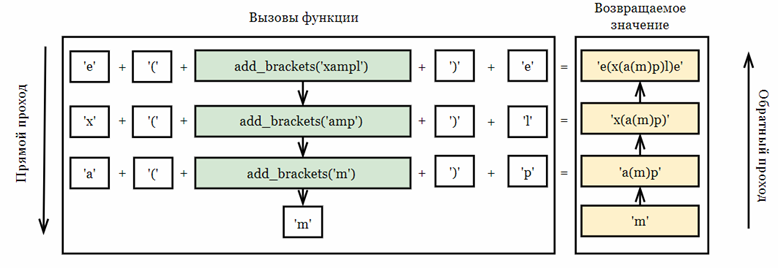

## <center> Работа с вложенными списками

### Задача №2

**Условие задачи.** В машинном обучении мы часто работаем с многомерными структурами. Например, двумерными матрицами. Пример матрицы размером 3x3 (3 строки, 3 столбца):
```python
matrix = [
    [1, 1, 0],
    [4, 2, 1],
    [0, 2, 1]
]
```

Могут быть и гораздо более сложные структуры, например трёхмерные или четырёхмерные массивы, но пока остановимся на двумерных.

В глубоком обучении (Deep Learning) есть специальная операция под названием flatten. Эта операция является важной частью архитектуры свёрточных нейронных сетей: она выпрямляет любой многомерный массив в одномерный.


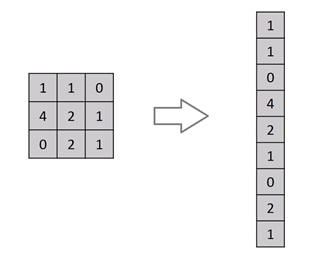

Например, в результате выполнения операции flatten для вложенного списка matrix мы должны получить список следующего вида:
```python
print(flatten(matrix))
## [1, 1, 0, 4, 2, 1, 0, 2, 1]
```

Напишем функцию flatten(), которая принимает на вход список, состоящий из других списков, и возвращает обычный список, в котором присутствуют все элементы из вложенных списков.


**Решение:**

In [ ]:
# Функция для выпрямления списка
def flatten(lst):
    # Создаём новый пустой список
    result = []
    # Создаём цикл по элементам списка
    for elem in lst:
        # Если элемент списка является списком,
        if type(elem) is list:
            # Применяем к нему функцию выпрямления и добавляем элементы к результату
            result += flatten(elem)
        else: # Если элемент не является списоком,
            # Добавляем элемент в новый список
            result.append(elem)
    return result

matrix = [
    [1, 1, 0],
    [4, 2, 1],
    [0, 2, 1]
]

print(flatten(matrix))

matrix = [
    [1, 1, [5, 10, 34, [24, 1, 0]]],
    [4, [9, 8, 10], 1],
    [0, 2, 1]
]
print(flatten(matrix))

[1, 1, 0, 4, 2, 1, 0, 2, 1]
[1, 1, 5, 10, 34, 24, 1, 0, 4, 9, 8, 10, 1, 0, 2, 1]


## <center> Древовидные структуры

## Задача №3

Условие задачи. Мы администрируем некоторый форум. Каждое сообщение на форуме имеет свой идентификатор. Сообщения на форуме могут иметь древовидную структуру, то есть существует корневое сообщение (нулевой уровень), на это сообщение могут быть ответы (первый уровень), а на каждый из этих ответов могут быть ещё ответы (второй уровень). Такая структура может быть бесконечной. То есть каждое сообщение может иметь:
* родителя — сообщение, на которое мы ответили на форуме своим сообщением;
* потомков — сообщения, которые являются ответом на наше сообщение.


Дан словарь forum_messages, ключами которого являются идентификаторы (id) сообщений на форуме. Значения в свою очередь также являются словарями. У этих словарей есть два ключа:
* parrent_link - родительская ссылка: может быть целым числом, если сообщение является ответом на другое сообщение, или None, если сообщение является корневым на форуме;
* child_link - список из идентификаторов дочерних сообщений, если таковые имеются, и пустой список, если таковых нет.
```python
forum_messages = {
    1: {'parrent_link': None, 'child_link': [3, 4]},
    2: {'parrent_link': None, 'child_link': [5]},
    3: {'parrent_link': 1, 'child_link': [6]},
    4: {'parrent_link': 1, 'child_link': []},
    5: {'parrent_link': 2, 'child_link': []},
    6: {'parrent_link': 3, 'child_link': []}
}
```

Схема (такая схема в математике называется графом), которая изображает сообщения, представленные в словаре forum_messages, представлена ниже:

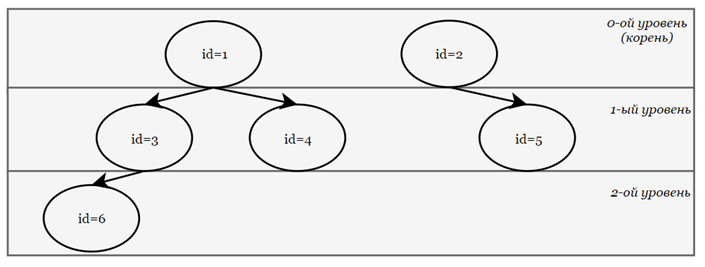

Необходимо реализовать функцию delete_message(), которая принимает на вход словарь со структурой форума и идентификатор сообщения. Функция должна удалять идентификатор сообщения из словаря, а также идентификаторы дочерних сообщений.

Например, вызов функции delete_message(forum_messages, msg_id=3) должен вернуть следующий словарь:

```python
{1: {'parrent_link': None, 'child_link': [4]},
 2: {'parrent_link': None, 'child_link': [5]},
 4: {'parrent_link': 1, 'child_link': []},
 5: {'parrent_link': 2, 'child_link': []}}
```
На схеме это выглядит следующим образом: 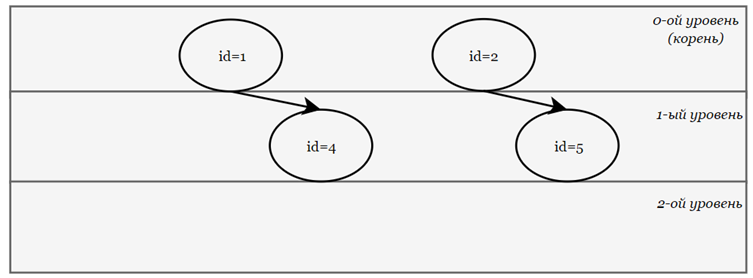


**Решение:**


In [ ]:
forum_messages = {
    1: {'parrent_link': None, 'child_link': [3, 4]},
    2: {'parrent_link': None, 'child_link': [5]},
    3: {'parrent_link': 1, 'child_link': [6]},
    4: {'parrent_link': 1, 'child_link': []},
    5: {'parrent_link': 2, 'child_link': []},
    6: {'parrent_link': 3, 'child_link': []}
}


# Функция для удаления сообщения на форуме и всех его потомков
def delete_message(messages, msg_id):
    # Удаляем из словаря сообщение с идентификатором msg_id
    # Метод pop() возвращает значение, лежащее по удаляемому ключу
    result = messages.pop(msg_id)
    # Получаем идентификатор родителя
    parrent_link = result['parrent_link']
    # Получаем список идентификаторов потомков
    child_link = result['child_link']
    # Если у сообщения был родитель и он ещё не был удален
    # Эта запись будет аналогична parrent_link is not None
    if parrent_link and parrent_link in messages:
        # Обращаемся к словарю messages по ключу родителя
        # Удаляем потомка из списка потомков
        messages[parrent_link]['child_link'].remove(msg_id)
    # Если у сообщения были потомки
    # Эта запись будет аналогична child_link == []
    if child_link:
        # В цикле проходимся по всем потомкам
        for child_id in child_link:
            # И повторяем те же самые действия для каждого из них
            # (рекурсивно вызываем функцию delete_message)
            delete_message(messages, msg_id=child_id)
    return messages

print(delete_message(forum_messages, msg_id=5))
#print(delete_message(forum_messages, msg_id=3))
#print(delete_message(forum_messages, msg_id=1))

{2: {'parrent_link': None, 'child_link': [5]},
 5: {'parrent_link': 2, 'child_link': []}}